In [1]:
data_path = '/content/drive/MyDrive/DA - PROJECTS/IES - GOV.BR/PDA_Lista_Instituicoes_Ensino_Superior_do_Brasil_EMEC.csv'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_ies = pd.read_csv(data_path, sep=',')
pd.set_option('display.max_columns', None)


In [3]:
# Visualizing the data frame
# This is the first thing that everyone does when it comes to analyze data. You should take a look at the dataframe and see how data is inputed, terms, values, etc.
df_ies

,CODIGO_DA_IES,NOME_DA_IES,SIGLA,CATEGORIA_DA_IES,COMUNITARIA,CONFESSIONAL,FILANTROPICA,ORGANIZACAO_ACADEMICA,CODIGO_MUNICIPIO_IBGE,MUNICIPIO,UF,SITUACAO_IES
0,21995,Faculdade de Tecnologia Senac Curitiba,NaN,Privada,N,N,N,Faculdade,4106902.0,Curitiba,PR,Ativa
1,5701,UNIVERSIDADE DO ESTADO DO AMAPÁ,UEAP,Pública,N,N,N,Universidade,1600303.0,Macapá,AP,Ativa
2,1768,FACULDADE REGIONAL SERRANA,FUNPAC,Privada,N,N,N,Faculdade,3205069.0,Venda Nova do Imigrante,ES,Extinta
3,23261,Faculdade São Judas de São Bernardo do Campo,NaN,Privada,N,N,N,Faculdade,3548708.0,São Bernardo do Campo,SP,Ativa
4,4250,FACULDADE DE CIÊNCIAS GERENCIAIS ALVES FORTES ...,FACE ALFOR JF,Privada,N,N,N,Faculdade,3136702.0,Juiz de Fora,MG,Extinta
...,...,...,...,...,...,...,...,...,...,...,...,...
4511,15792,Faculdade de Rondônia,FARO,Privada,N,N,N,Faculdade,NaN,NaN,NaN,Extinta
4512,1888,FACULDADE DE SAÚDE TECSOMA,FASTEC,Privada,N,N,N,Faculdade,NaN,NaN,NaN,Extinta
4513,925,FACULDADE DE CIÊNCIAS GERÊNCIAIS DE VILHENA,FCGV,Privada,N,N,N,Faculdade,NaN,NaN,NaN,Extinta
4514,22739,Instituto SOCIESC de Itajaí,SOCIESC,Privada,N,N,N,Faculdade,NaN,NaN,NaN,Extinta


In [ ]:
# Understanding the format of data its type and how you should deal with it.
df_ies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4516 entries, 0 to 4515
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CODIGO_DA_IES          4516 non-null   int64  
 1   NOME_DA_IES            4516 non-null   object 
 2   SIGLA                  3663 non-null   object 
 3   CATEGORIA_DA_IES       4516 non-null   object 
 4   COMUNITARIA            4516 non-null   object 
 5   CONFESSIONAL           4516 non-null   object 
 6   FILANTROPICA           4516 non-null   object 
 7   ORGANIZACAO_ACADEMICA  4516 non-null   object 
 8   CODIGO_MUNICIPIO_IBGE  3996 non-null   float64
 9   MUNICIPIO              3996 non-null   object 
 10  UF                     3996 non-null   object 
 11  SITUACAO_IES           4516 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 423.5+ KB


In [ ]:
# Here I counted higher education institutions by type of academic organization, disregarding whether it was active(ativa) or defunct(extinta).
ies_counts = df_ies['ORGANIZACAO_ACADEMICA'].value_counts().reset_index()
print(ies_counts)

                               ORGANIZACAO_ACADEMICA  count
0                                          Faculdade   3695
1                               Centro Universitário    438
2                                       Universidade    227
3  Instituto Federal de Educação, Ciência e Tecno...     41
4                                  Escola de Governo     40
5  Instituição Especialmente Credenciada para ofe...     40
6                            Faculdade de Tecnologia     21
7              Instituto Superior ou Escola Superior      7
8             Centro Federal de Educação Tecnológica      5
9                              Faculdades Integradas      2


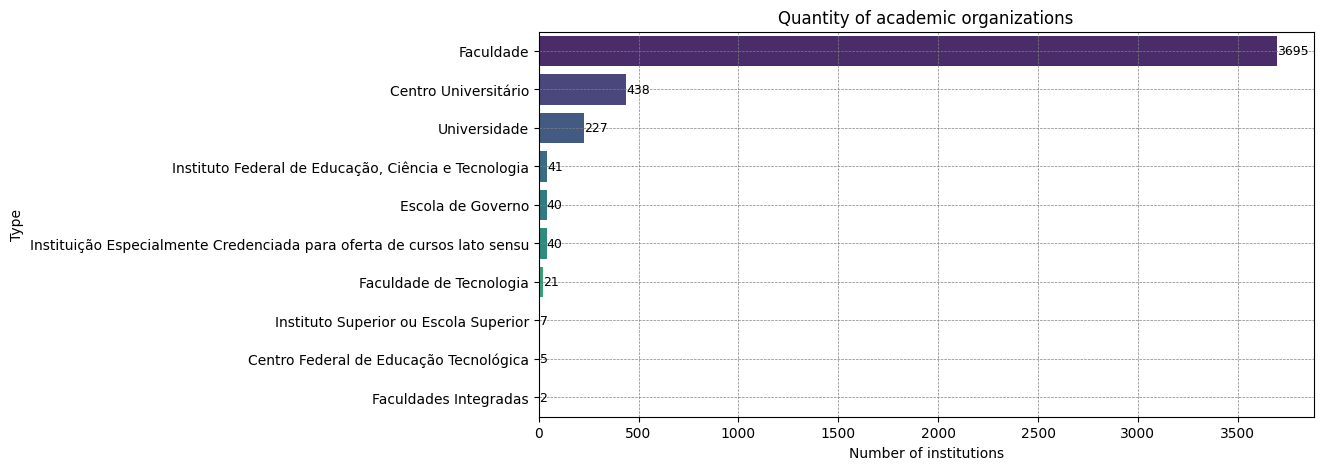

In [31]:
# With this information I was able to generate a graph using the two visualization libraries, matplotlib and seaborn.
# My goal was to analyze the higher education institutions by type of academic organization
ies_counts = df_ies['ORGANIZACAO_ACADEMICA'].value_counts().reset_index()
ies_counts.columns = ['Academic Organization', 'Quantity']

plt.figure(figsize=(10, 5))
sns.barplot(data=ies_counts, x='Quantity', y='Academic Organization', hue='Academic Organization', palette='viridis')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Quantity of academic organizations')
plt.xlabel('Number of institutions')
plt.ylabel('Type')
for i, value in enumerate(ies_counts['Quantity']):
    plt.text(value + 1, i, str(value), ha='left', va='center', fontsize=9)
plt.show()

In [ ]:
# Now I have translated the indexes from my count (which aims to divide institutions into public and private)
categories = df_ies['CATEGORIA_DA_IES'].replace({
    'Privada': 'Private',
    'Pública': 'Public'
})
categories.value_counts().reset_index()

,CATEGORIA_DA_IES,count
0,Private,3998
1,Public,518


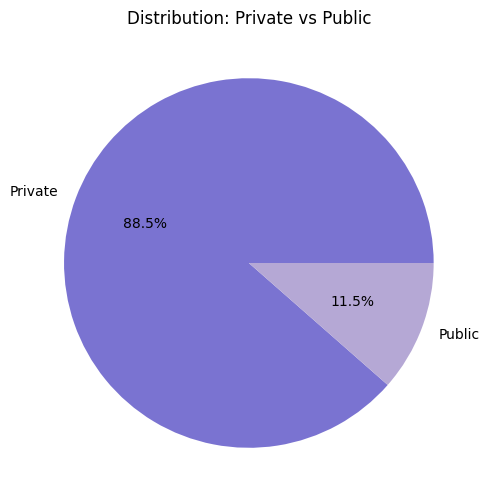

In [ ]:
# With the help of matplotlib I created this pie chart representing the percentage of each category (public and private), overall.
categories = df_ies['CATEGORIA_DA_IES'].replace({
    'Privada': 'Private',
    'Pública': 'Public'
})

plt.figure(figsize=(6, 6))
categories.value_counts().plot.pie(autopct='%1.1f%%', colors=['#7A73D1', '#B5A8D5'])
plt.title('Distribution: Private vs Public')
plt.ylabel('')
plt.show()


In [ ]:
# I then needed to do a count grouping by state how many active institutions there are in each location presented.
actives_ies = df_ies[df_ies['SITUACAO_IES'] == 'Ativa']
state_counts = actives_ies['UF'].value_counts().sort_values(ascending=False)
print(state_counts)

UF
SP    714
MG    350
PR    186
BA    168
RJ    154
GO    151
PE    137
RS    133
SC    121
CE    115
DF     95
PA     86
MT     85
ES     79
MA     74
PI     53
PB     48
MS     43
AM     40
AL     34
RO     33
RN     31
TO     29
SE     22
AP     16
RR     11
AC     10
Name: count, dtype: int64


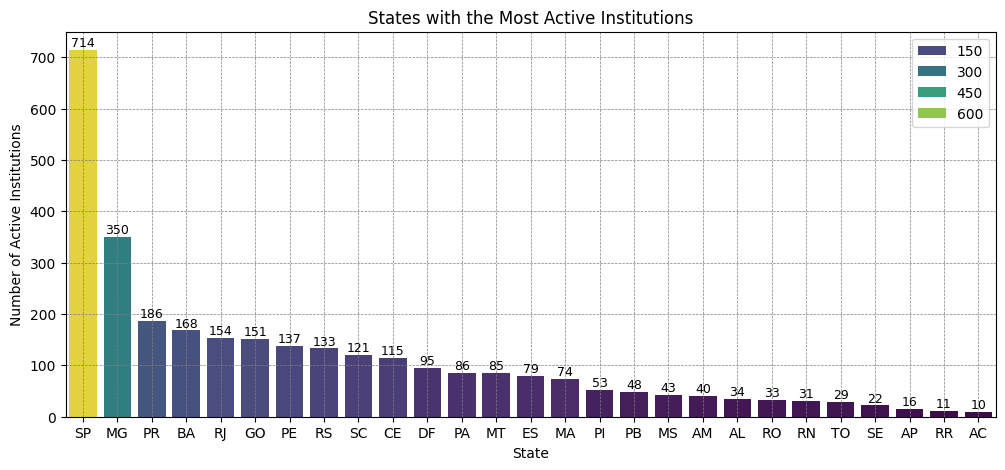

In [29]:
# With the help of matplotlib and Seaborn I created this bar chart representing the States with the Most Active Institutions
actives_ies = df_ies[df_ies['SITUACAO_IES'] == 'Ativa']
state_counts = actives_ies['UF'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=state_counts.index, y=state_counts.values, hue=state_counts.values, palette='viridis')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('States with the Most Active Institutions')
plt.xlabel('State')
plt.ylabel('Number of Active Institutions')
for i, value in enumerate(state_counts.values):
    ax.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=9)
plt.show()

In [26]:
# I then needed to do a count grouping by state how many active public institutions there are in each location presented.
actives_ies = df_ies[df_ies['SITUACAO_IES'] == 'Ativa']
public = df_ies[df_ies['CATEGORIA_DA_IES'] == 'Pública']
public_actives = df_ies[(df_ies['SITUACAO_IES'] == 'Ativa') & (df_ies['CATEGORIA_DA_IES'] == 'Pública')]

pb_ac_c = public_actives['UF'].value_counts().sort_values(ascending=False).sort_values(ascending=False)

print(pb_ac_c)

UF
SP    113
RJ     39
PE     29
MG     24
DF     18
GO     15
PR     13
BA     10
RS     10
SC      9
CE      7
PA      6
TO      6
PI      5
ES      5
MA      5
RN      5
AL      4
MS      4
PB      4
MT      4
AP      3
RR      3
AM      3
AC      2
SE      2
RO      2
Name: count, dtype: int64


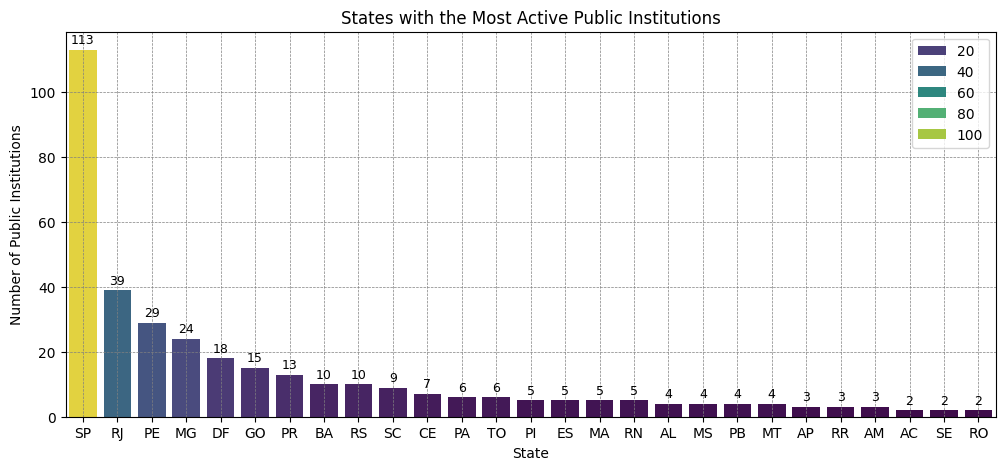

In [28]:
# With the help of matplotlib and Seaborn I created this bar chart representing the States with the Most Active Public Institutions
# Which aims to present the analysis made
actives_ies = df_ies[df_ies['SITUACAO_IES'] == 'Ativa']
public = df_ies[df_ies['CATEGORIA_DA_IES'] == 'Pública']
public_actives = df_ies[(df_ies['SITUACAO_IES'] == 'Ativa') & (df_ies['CATEGORIA_DA_IES'] == 'Pública')]

pb_ac_c = public_actives['UF'].value_counts().sort_values(ascending=False).sort_values(ascending=False)

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=pb_ac_c.index, y=pb_ac_c.values, hue=pb_ac_c.values, palette='viridis')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('States with the Most Active Public Institutions')
plt.xlabel('State')
plt.ylabel('Number of Public Institutions')
for i, value in enumerate(pb_ac_c.values):
    ax.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=9)
plt.show()

In [ ]:
# I then needed to do a count grouping by state how many active private institutions there are in each location presented.
actives_ies = df_ies[df_ies['SITUACAO_IES'] == 'Ativa']
private = df_ies[df_ies['CATEGORIA_DA_IES'] == 'Privada']
private_actives = df_ies[(df_ies['SITUACAO_IES'] == 'Ativa') & (df_ies['CATEGORIA_DA_IES'] == 'Privada')]

prv_ac_c = private_actives['UF'].value_counts().sort_values(ascending=False).sort_values(ascending=False)

print(prv_ac_c)

UF
SP    601
MG    326
PR    173
BA    158
GO    136
RS    123
RJ    115
SC    112
CE    108
PE    108
MT     81
PA     80
DF     77
ES     74
MA     69
PI     48
PB     44
MS     39
AM     37
RO     31
AL     30
RN     26
TO     23
SE     20
AP     13
RR      8
AC      8
Name: count, dtype: int64


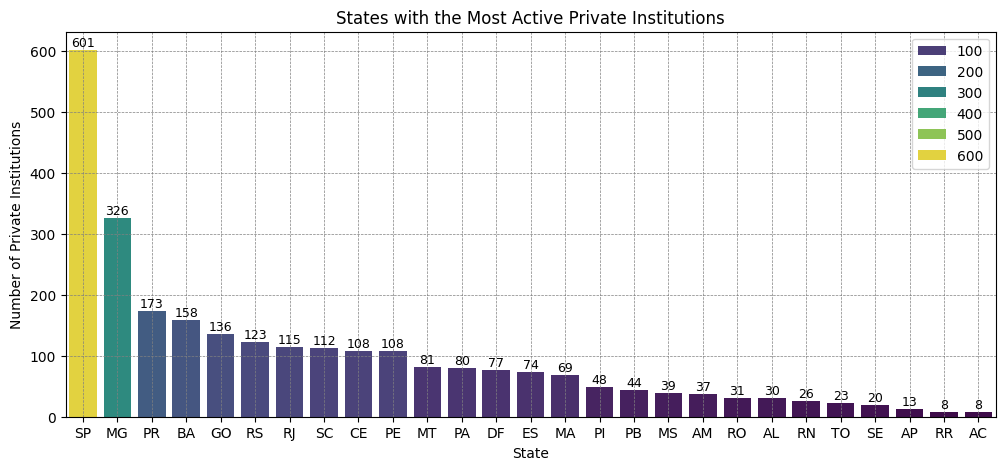

In [32]:
# I then turned this into a graph
# Which aims to present the analysis made
actives_ies = df_ies[df_ies['SITUACAO_IES'] == 'Ativa']
private = df_ies[df_ies['CATEGORIA_DA_IES'] == 'Privada']
private_actives = df_ies[(df_ies['SITUACAO_IES'] == 'Ativa') & (df_ies['CATEGORIA_DA_IES'] == 'Privada')]

prv_ac_c = private_actives['UF'].value_counts().sort_values(ascending=False).sort_values(ascending=False)

plt.figure(figsize=(12, 5))
ax = sns.barplot(x=prv_ac_c.index, y=prv_ac_c.values, hue=prv_ac_c.values, palette='viridis')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('States with the Most Active Private Institutions')
plt.xlabel('State')
plt.ylabel('Number of Private Institutions')

for i, value in enumerate(prv_ac_c.values):
    ax.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=9)
plt.show()


In [7]:
# The type of the institutions are varies and even religion related, so I picked up 3 types to analyze and see its presence at the dataframe.
df_ativas = df_ies[df_ies['SITUACAO_IES'] == 'Ativa']

typeof = ['CONFESSIONAL', 'COMUNITARIA', 'FILANTROPICA']

df_types = df_ies[typeof].apply(lambda x: (x == 'S').sum())

translate = {'CONFESSIONAL':'Confessional','COMUNITARIA':'Community-based','FILANTROPICA': 'Philanthropic'}
df_types.rename(index=translate, inplace=True)

print(df_types)

Confessional       65
Community-based    89
Philanthropic       4
dtype: int64


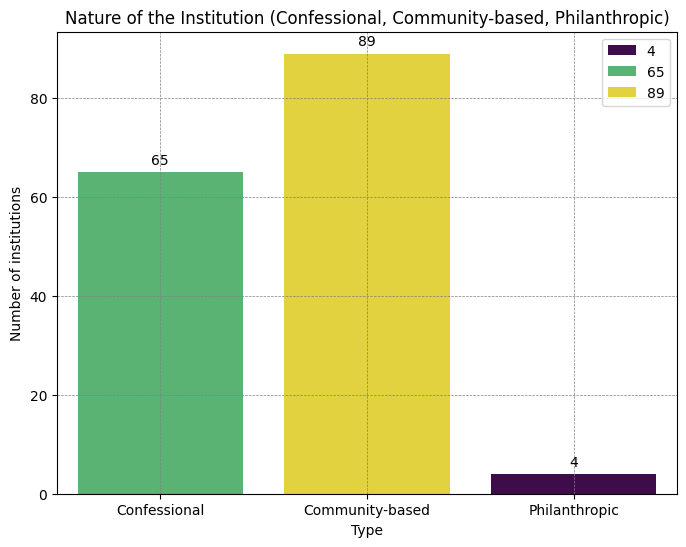

In [33]:
typeof = ['CONFESSIONAL', 'COMUNITARIA', 'FILANTROPICA']

df_types = df_ies[typeof].apply(lambda x: (x == 'S').sum())

translate = {'CONFESSIONAL':'Confessional','COMUNITARIA':'Community-based','FILANTROPICA': 'Philanthropic'}

df_types.rename(index=translate, inplace=True)

plt.figure(figsize=(8, 6))
sns.barplot(x=df_types.index, y=df_types.values, hue=df_types.values, palette='viridis')
plt.grid(color='gray', linestyle='--', linewidth=0.5)
plt.title('Nature of the Institution (Confessional, Community-based, Philanthropic)')
plt.xlabel('Type')
plt.ylabel('Number of institutions')
for i, value in enumerate(df_types.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)
plt.show()

## That was it! Well thank you for taking your time to go through my analysis!
The academic field and research its an important part of my life and it was really enjoyfull to go throught this data exploration.
I hope you had a great time as i did. If you want to connect just contact me at LinkedIn or E-mail! Everything is at my github profile! Bye!